In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from encoding_information.information_estimation import *
from encoding_information.image_utils import *
from encoding_information.models.gaussian_process import StationaryGaussianProcess

from encoding_information.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np


2023-10-26 11:46:20.725862: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 11:46:21.349363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cublas/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_cupti/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_nvcc/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_nvrtc/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_runtime/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/pyth

In [3]:
from encoding_information.bsccm_utils import *
from encoding_information.image_utils import *

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

# load images, extract patches, and compute cov mats
edge_crop = 32
patch_size = 5
num_images = 1000

# channel = 'LED119'
channel = 'DPC_Right'

num_test_images = 500

all_images = load_bsccm_images(bsccm, channel=channel, num_images=num_images + num_test_images, edge_crop=edge_crop, median_filter=False)
images = all_images[:num_images]
test_images = all_images[num_images:]
test_patches = extract_patches(test_images, patch_size, num_patches=num_test_images, seed=0)

num_patches = 1000
seed = 10

patches = extract_patches(images, patch_size, num_patches=num_patches, seed=seed)


Opening BSCCM
Opened BSCCM


In [4]:
eigenvalue_floor = 1e-3

from encoding_information.models.pixel_cnn import PixelCNN

pixel_cnn = PixelCNN()

pixel_cnn.fit(patches, max_epochs=5, num_val_samples=100)

2023-10-26 11:46:53.641857: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Initial validation NLL: 314.31


Epoch 1: 100%|██████████| 100/100 [00:05<00:00, 18.19it/s]


Epoch 1: validation NLL: 6.25


Epoch 2: 100%|██████████| 100/100 [00:00<00:00, 104.34it/s]


Epoch 2: validation NLL: 5.60


Epoch 3: 100%|██████████| 100/100 [00:00<00:00, 106.90it/s]


Epoch 3: validation NLL: 5.30


Epoch 4: 100%|██████████| 100/100 [00:00<00:00, 106.13it/s]


Epoch 4: validation NLL: 5.22


Epoch 5: 100%|██████████| 100/100 [00:00<00:00, 106.63it/s]

Epoch 5: validation NLL: 5.22


[314.31060791015625,
 6.250897407531738,
 5.601657867431641,
 5.297093391418457,
 5.218769550323486,
 5.217545986175537]

Generating PixelCNN samples: 100%|██████████| 10/10 [01:20<00:00,  8.08s/it]


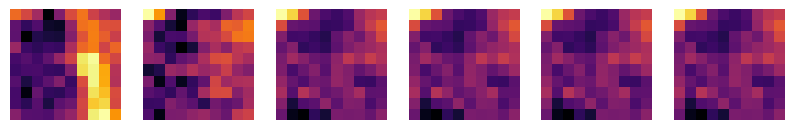

In [7]:
samples = pixel_cnn.generate_samples(3, 10)

fig, axs = plt.subplots(1, samples.shape[0], figsize=(10, 10))
for k in range(samples.shape[0]):
    axs[k].imshow(samples[k], cmap='inferno')
    axs[k].axis('off')
    

In [6]:
samples

Array([[[ 979.5630178 ,  880.66045281,  761.95074457],
        [ 885.43834494,  723.84068121,  644.24404599],
        [ 748.8026461 ,  560.66636878,  601.30195573]],

       [[1283.72662769, 1403.83734892, 1581.57750844],
        [1283.25113277, 1550.82644136, 1796.39901114],
        [ 947.08028326, 1392.07069234, 1168.86379635]],

       [[ 999.59443133,  911.38851727,  839.62646281],
        [ 957.62144962,  856.67709323,  756.54578246],
        [ 861.73339913,  839.58960085,  703.14856307]],

       [[1065.15969607,  969.12269501,  860.13496664],
        [1041.52647655,  964.26257383,  872.03370449],
        [1085.67603411, 1024.84835926,  871.44331605]],

       [[1101.28831028, 1027.08923216,  917.18187474],
        [1268.81597105, 1252.271136  , 1129.24344299],
        [1446.37916364, 1346.25084914, 1178.17906044]],

       [[ 781.90730468,  639.78026758,  452.95015475],
        [ 617.962327  ,  453.22134183,  367.81894293],
        [ 483.99323737,  390.5566132 ,  521.75807769]],